# Imports

In [ ]:
# 1.Importing libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

!python --version
pd.__version__

#from pandas_profiling import ProfileReport -> quickly do an EDA
#profile = ProfileReport(df, explorative=True)
#profile = ProfileReport(df, explorative=True)

#df['x']=df['x'].str.replace(',','')
#df.astype('str')

Python 3.6.9


'1.1.4'

In [ ]:
# 2.Loading the data into a dataframe 

data = pd.read_csv('ted_main.csv')
data.head() #data.tail()
# duration, film_date, published_date -> are not in the right format

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# 1. Undestand the data

In [ ]:
# 3.Understanding the data and identifying data types 
data.shape #There are 2550 rows and 17 columns.

(2550, 17)

In [ ]:
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [ ]:
data.describe() # see how the data is distributed

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [ ]:
data.info() #data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [ ]:
data.isnull().sum() # speaker_occupation has 6 missing values. For now we won't drop the values

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [ ]:
data.nunique() #checks for unique values

comments               559
description           2550
duration              1083
event                  355
film_date              735
languages               66
main_speaker          2156
name                  2550
num_speaker              5
published_date        2490
ratings               2550
related_talks         2550
speaker_occupation    1458
tags                  2530
title                 2550
url                   2550
views                 2550
dtype: int64

In [ ]:
# 4.Variable transformations 

# Now we'll convert unix to datetime format
from datetime import datetime

data['film_date'] = pd.to_datetime(data['film_date'], unit='s')
data['published_date'] = pd.to_datetime(data['published_date'], unit='s')
data['duration'] = data['duration'].apply(lambda x: round((x/60), 2)) # we converted seconds to minutes

# data['duration'] = pd.to_timedelta(data['duration'], unit='s') - option would be to convert to timedelta, but not needed

data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.28,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.43,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.60,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.83,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# 2. Data Cleaning

In [ ]:
# 5.Cleaning the data  
# df = df.dropna(how='any') # drop missing values
# nan = df[df.isna().any(axis=1)]
  
# Convert to the right format -> when we have column formats
#data['num_speaker'] = data['num_speaker'].astype('int64')

# 3. Visualizing Results

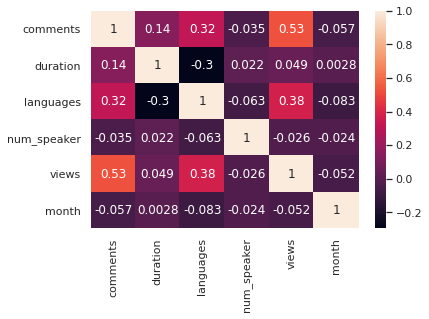

In [ ]:
# 6.Correlation Analysis
sns.set(style="whitegrid")
variables = data.corr()

sns.heatmap(variables, annot=True) #xticklabels=
plt.show()

# Heatmaps are used to find coorelation between two variables and find partters in our dat
# 0.5 or higher suggest medium to strong correlation, for ex nr of speakers doesn't influence views

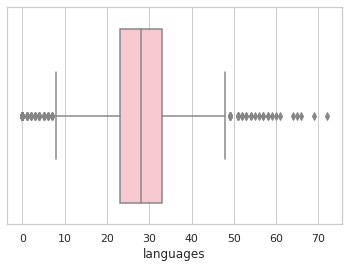

In [ ]:
# 7.Univariate Analysis 
sns.set(style="whitegrid")

sns.boxplot(x=data['languages'], color="pink")
plt.show()

# boxplox: detecting outliers

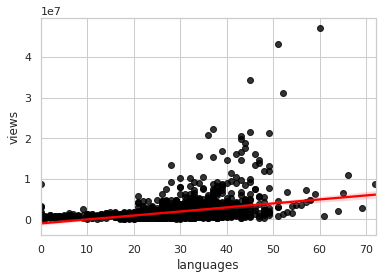

In [ ]:
# 8.Bivariate / multivariate analysis 

sns.regplot(x=data['languages'], y=data['views'], data=data,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
# scatterplot: are used to observe relationships between variables.

In [ ]:
data['duration'].mean()

13.775152941176481

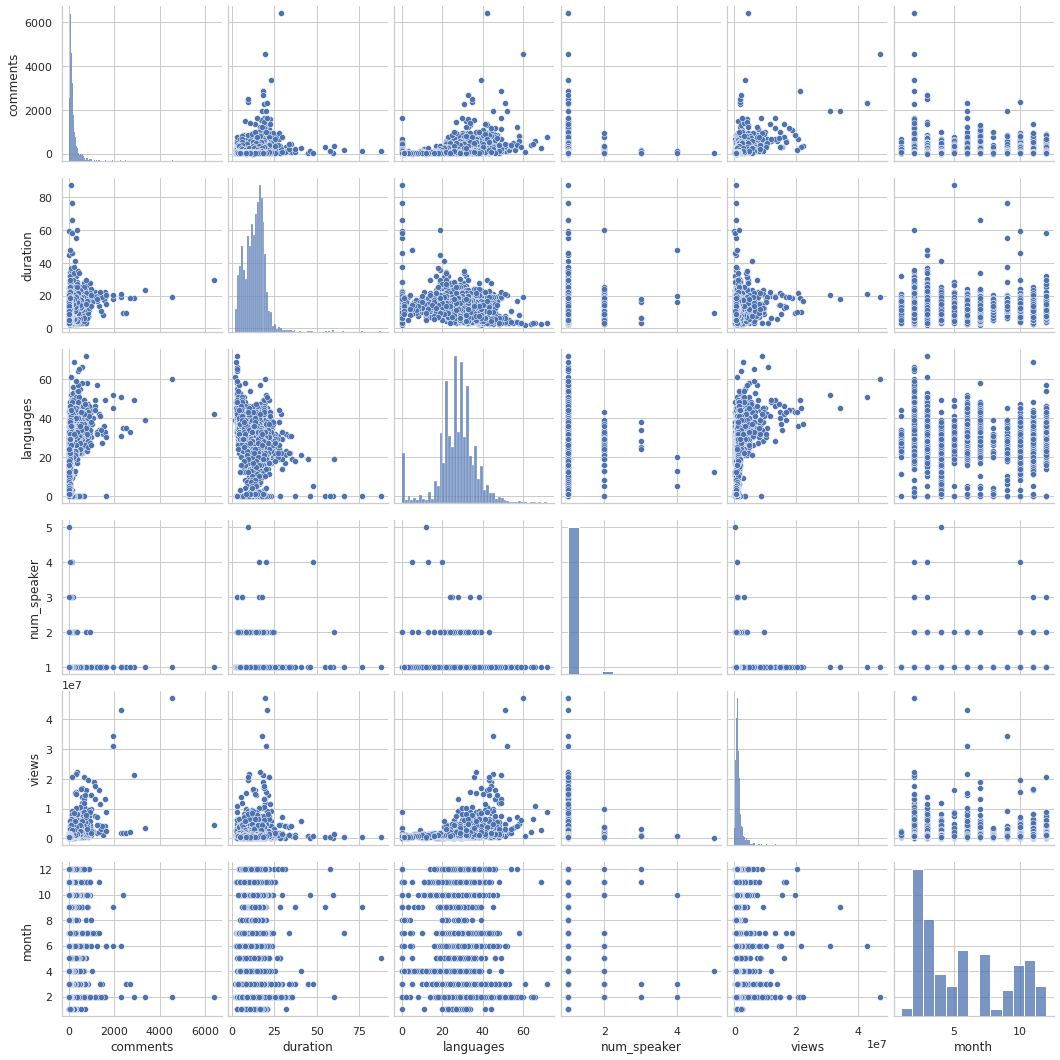

In [ ]:
sns.pairplot(data) 

# It produces a matrix of relationships between each variable in your data for an instant examination of our data. 
# It can also be a great jumping off point for determining types of regression analysis to use.

# Insight: the videos w/ duration around 20 min is have the most views

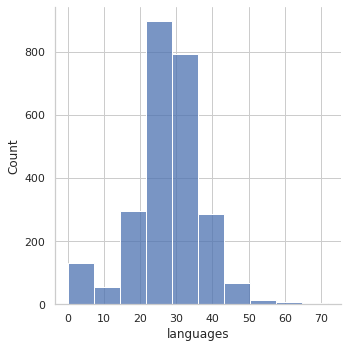

In [ ]:
sns.displot(data['languages'], kind='hist', bins=10)
plt.show()

# histogram: helps see the shape of the data's distribution, is close to a normal one.
# skewed distribution when there are too many extreme values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


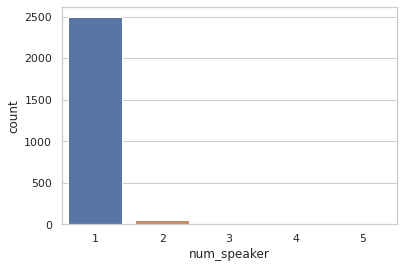

In [ ]:
sns.countplot(data['num_speaker'])
plt.show()
# used to Show the counts of observations in each categorical bin using bars

# Answering some questions about data

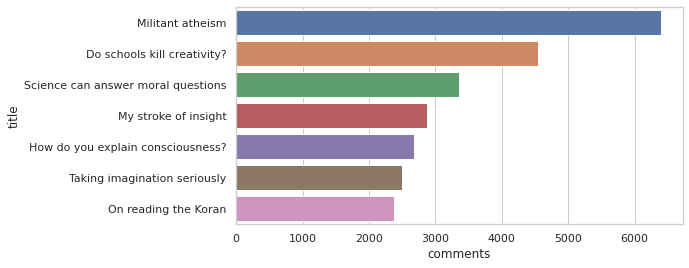

In [ ]:
# 1.which ones are the most engaging videos? (Most comments) 
plt.figure(figsize=(8,4))
top_vid = data[["main_speaker", "title", "event", "comments"]].sort_values('comments', ascending=False)[:7] # .head(5)

sns.barplot(x="comments", y="title", data=top_vid)
plt.show()
# The talks that really gets peole talking are mostly about religion

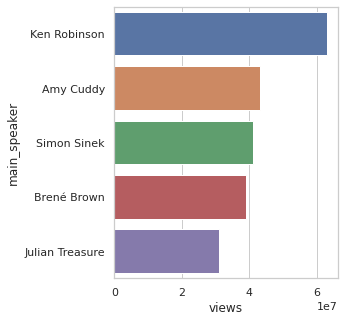

In [ ]:
# 2.Which speaker attracts more audience? (highest views)
top_sp = data[['main_speaker', 'comments', 'views']].groupby(['main_speaker']).sum().sort_values('views', ascending=False)[:5].reset_index()

# ploting
plt.figure(figsize=(4,5))
sns.barplot(x='views', y='main_speaker', data=top_sp)
plt.show()

# Ken Robinson attracts more audience, so we should hire him more often!

In [ ]:
# 3.What are my viewers mostly interested in? (Trending Topics) 
tags = pd.DataFrame(data['tags'].str.split(",").tolist(), index=data['title']).stack()
tags_tb = tags.reset_index([0, 'title'])

tags_tb.columns = ['title', 'tag']

#Clean the tags
for c in tags_tb:
  tags_tb[c] = tags_tb[c].map(lambda x: str(x).replace("['","").replace("']","").replace("'","").replace('"',""))

tags_tb['tag'].value_counts(ascending=False)[:5]

 technology       726
 science          567
 global issues    480
 design           392
 culture          380
Name: tag, dtype: int64

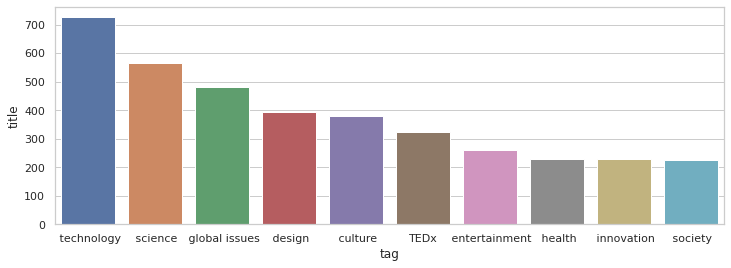

In [ ]:
tb = tags_tb.groupby('tag').count().sort_values('title', ascending=False)[:10].reset_index()

# ploting
plt.figure(figsize=(12,4))
sns.barplot(x='tag', y='title', data=tb)
plt.show()

In [ ]:
tb['title'].nlargest(1)/tb['title'].sum()
# tech represents 19% of all TED topics

0    0.190651
Name: title, dtype: float64

# Other questions

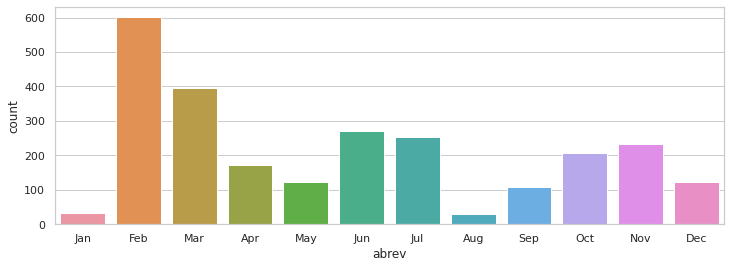

In [ ]:
# What is our team's most productive month?
plt.figure(figsize=(12,4))

data['month'] = data['film_date'].dt.month
#data['year'] = data['film_date'].dt.year

# Count values and rename columns
num_mm_talks = data['month'].value_counts().reset_index()
num_mm_talks.columns = ["month", "count"]

# Adding names to months
num_mm_talks = num_mm_talks.sort_values(by=['month'])
num_mm_talks['abrev'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = sns.barplot(x='abrev', y='count', data=num_mm_talks)

plt.show()
# Most of the talks were recorded in February. 

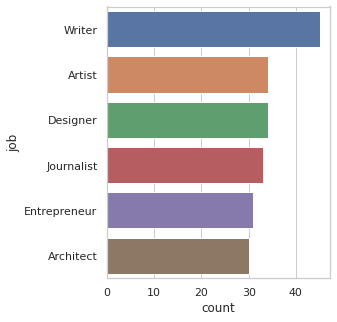

In [ ]:
# What job does the speakers have?
jobs = pd.DataFrame(data=data["speaker_occupation"].value_counts().sort_values(ascending=False)[:6].reset_index())
jobs.columns = ['job', 'count']

# ploting
plt.figure(figsize=(4,5))
sns.barplot(x='count', y='job', data=jobs)
plt.show()
# The most popular as writers, 

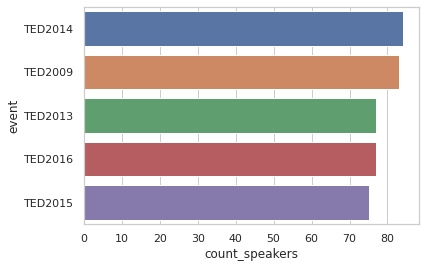

In [ ]:
# What are the most popular Ted Talks and Ted Events?
pp = data.groupby(['event']).agg({'main_speaker':'nunique','event':'count','views':'sum','comments':'sum'})
pp.columns=['count_events','count_speakers','tot_views','tot_comments']
pp.reset_index(inplace=True)

new_pp = pp.sort_values('count_speakers',ascending=False)[:5]

sns.barplot(x='count_speakers', y='event', data=new_pp)
plt.show()